<a href="https://colab.research.google.com/github/anasharma7/CYBERSEC/blob/main/ML_Phishing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# --- 1. Load Data ---
file_path = 'wc1.csv'
df = pd.read_csv(file_path)

print("--- Data Loading ---")
print(f"Loaded {file_path}, shape: {df.shape}")
print("\n--- Data Info ---")
df.info()
print("\n--- Data Head ---")
print(df.head())

--- Data Loading ---
Loaded wc1.csv, shape: (24232, 13)

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24232 entries, 0 to 24231
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   inline_count               24232 non-null  float64
 1   external_count             24232 non-null  float64
 2   onclick_count              24232 non-null  int64  
 3   onload_count               24232 non-null  float64
 4   onchange_count             24232 non-null  float64
 5   avg_inline_script_block    24232 non-null  float64
 6   avg_external_script_block  24232 non-null  float64
 7   avg_onclick_count          24232 non-null  int64  
 8   avg_onload_count           24232 non-null  int64  
 9   avg_onchange_count         24232 non-null  int64  
 10  avg_cyc_complexity         24232 non-null  float64
 11  library_code_count         24232 non-null  int64  
 12  type                       

In [ ]:
# --- 2. Preprocessing ---
print("--- 2. Preprocessing ---")
# Separate features (X) and target (y)
X = df.drop('type', axis=1)
y = df['type']
feature_names = X.columns.tolist()

# Encode the target variable 'type'
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Ensure 'phish' is the positive class (1)
if le.classes_[1] == 'phish':
    print(f"Class mapping: {le.classes_[0]} (0), {le.classes_[1]} (1)")
    print("'phish' is correctly encoded as 1.")
else:
    # If 'alexa' is 1 and 'phish' is 0, we flip it
    print(f"Original mapping: {le.classes_[0]} (0), {le.classes_[1]} (1)")
    print("Flipping encoding so that 'phish' is 1.")
    y_encoded = 1 - y_encoded
    print(f"New mapping: alexa (0), phish (1)")

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3. Train-Test Split ---
print("\n--- 3. Train-Test Split ---")
# Split the data: 33% test, 67% train
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.33, random_state=42
)
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

--- 2. Preprocessing ---
Class mapping: alexa (0), phish (1)
'phish' is correctly encoded as 1.

--- 3. Train-Test Split ---
Training data shape: (16235, 12)
Testing data shape: (7997, 12)


In [ ]:
# --- 4. Train Logistic Regression Model ---
print("\n--- 4. Train Model ---")
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")


--- 4. Train Model ---
Logistic Regression model trained successfully.



--- 5. Evaluation ---
--- Classification Report ---
              precision    recall  f1-score   support

   alexa (0)       0.84      0.93      0.88      5743
   phish (1)       0.76      0.55      0.64      2254

    accuracy                           0.83      7997
   macro avg       0.80      0.74      0.76      7997
weighted avg       0.82      0.83      0.82      7997

--- Confusion Matrix ---
[[5352  391]
 [1007 1247]]
Confusion matrix plot saved as 'confusion_matrix.png'


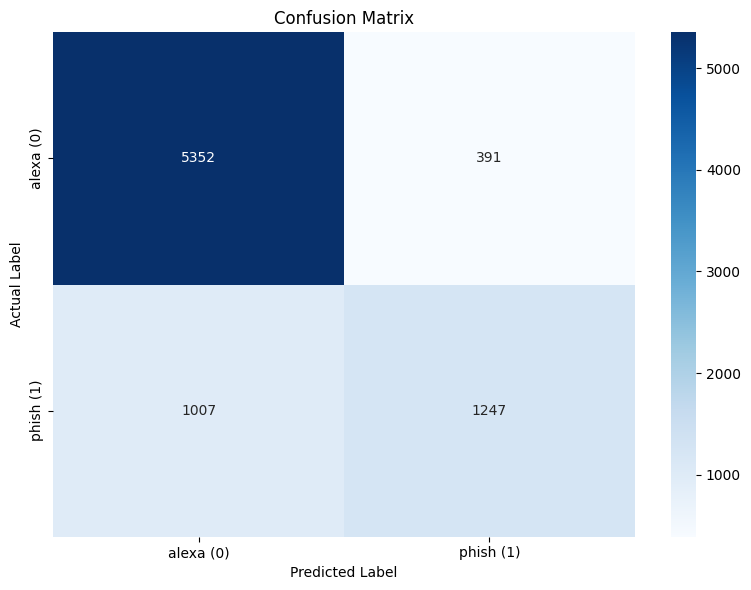

In [ ]:
# --- 5. Evaluation: Confusion Matrix & Report ---
print("\n--- 5. Evaluation ---")
y_pred = model.predict(X_test)

# Print Classification Report
print("--- Classification Report ---")
target_names = ['alexa (0)', 'phish (1)']
print(classification_report(y_test, y_pred, target_names=target_names))

# Generate and print Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("--- Confusion Matrix ---")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
print("Confusion matrix plot saved as 'confusion_matrix.png'")


--- 6. Feature Importance ---
Feature importances (coefficients):
                      Feature  Importance
11         library_code_count    0.424617
4              onchange_count    0.113287
8            avg_onload_count    0.067274
5     avg_inline_script_block   -0.039691
7           avg_onclick_count   -0.069285
3                onload_count   -0.116972
0                inline_count   -0.225105
2               onclick_count   -0.232487
6   avg_external_script_block   -0.370192
10         avg_cyc_complexity   -0.468035
1              external_count   -0.824639
9          avg_onchange_count   -1.012262


/tmp/ipython-input-1811553030.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='vlag')


Feature importance plot saved as 'feature_importance.png'


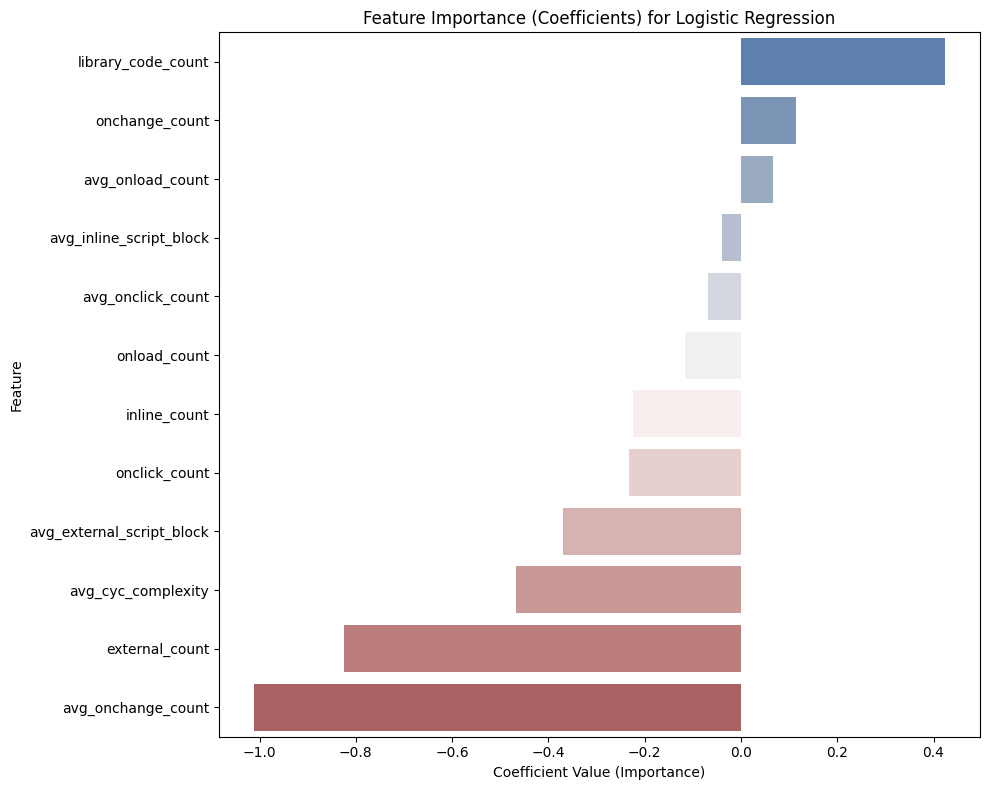

In [ ]:
# --- 6. Feature Importance Analysis ---
print("\n--- 6. Feature Importance ---")
# Get coefficients
importances = model.coef_[0]
# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature importances (coefficients):")
print(feature_importance_df)

# Plot Feature Importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='vlag')
plt.title('Feature Importance (Coefficients) for Logistic Regression')
plt.xlabel('Coefficient Value (Importance)')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance.png')
print("Feature importance plot saved as 'feature_importance.png'")


--- 7. ROC Curve and AUC ---
Area Under Curve (AUC): 0.8471
ROC curve plot saved as 'roc_curve.png'


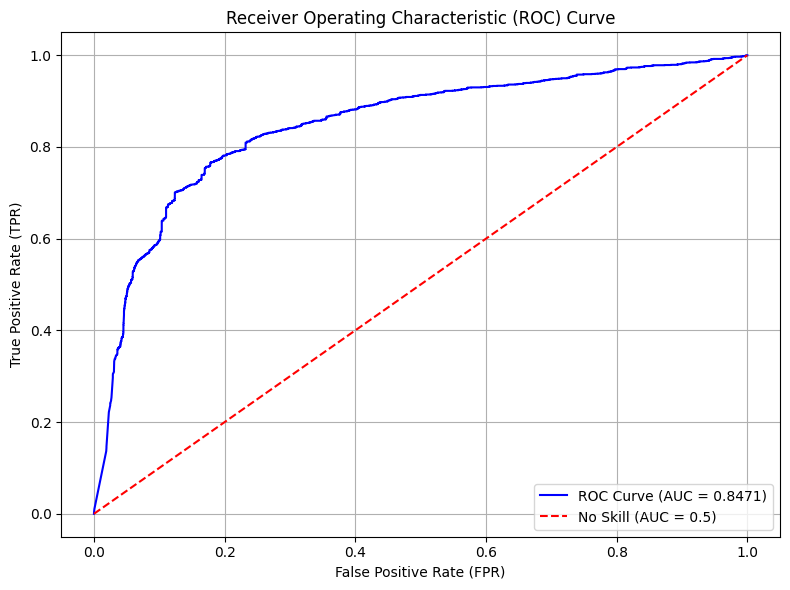

In [ ]:
# --- 7. ROC Curve and AUC ---
print("\n--- 7. ROC Curve and AUC ---")
# Get probabilities for the positive class (phish)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"Area Under Curve (AUC): {auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='No Skill (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig('roc_curve.png')
print("ROC curve plot saved as 'roc_curve.png'")